<a href="https://colab.research.google.com/github/tommasomncttn/NLP-Disaster-Tweet-Detection/blob/main/ULMfiT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.text.all import *
import pandas as pd
from sklearn.model_selection import train_test_split

# Fine tune a pre-trained model as a classifier

In [11]:
df = pd.read_csv("/content/drive/MyDrive/ML_proj/train.csv")
df.drop(columns = ["id", "keyword", "location"], inplace=True)


In [12]:
dls = TextDataLoaders.from_df(df, path='.', valid_pct=0.2, seed=None,
                          text_col=0, label_col=1, label_delim=None,
                          y_block=None, text_vocab=None, is_lm=False,
                          valid_col=None, tok_tfm=None,
                          tok_text_col='text', seq_len=72)
dls.show_batch()

In [14]:
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)

In [15]:
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.590429,0.515331,0.758213,03:29


epoch,train_loss,valid_loss,accuracy,time
0,0.536059,0.444147,0.791064,08:57
1,0.496015,0.419287,0.819974,08:54
2,0.426667,0.404320,0.831143,08:55
3,0.367773,0.421032,0.819317,09:50


In [16]:
learn.show_results()

,text,category,category_
0,xxbos xxup info xxup s. xxup wnd : xxunk / 6 . xxup xxunk : xxup xxunk xxup xxunk . xxup exp xxup inst xxup apch . xxup rwy 05 . xxup curfew xxup in xxup oper xxup until 2030 xxup z. xxup taxiways xxup foxtrot 5 & & xxup foxtrot 6 xxup navbl . xxup tmp : 10 .,0,1
1,xxbos xxmaj truth … \n https : / / t.co / xxunk \n▁ # xxmaj news \n▁ # xxup bbc \n▁ # xxup cnn \n▁ # xxmaj islam \n▁ # xxmaj truth \n▁ # god \n▁ # xxup isis \n▁ # terrorism \n▁ # xxmaj quran \n▁ # xxmaj lies http : / / t.co / xxunk,0,1
2,xxbos # nowplaying * xxmaj cliff xxmaj richard - i xxmaj could xxmaj easily xxmaj fall ( in xxmaj love xxmaj with xxmaj you ) ( & & xxmaj xxunk ) * # xxmaj internet # xxmaj xxunk # xxmaj radio xxmaj on http : / / t.co / xxunk,0,0
3,xxbos i xxup hate xxup when xxup i m xxup trying xxup to xxup xxunk xxup my xxup hair xxup and xxup my xxup brother xxup comes xxup xxunk xxup in xxup behind xxup me xxup and xxup xxunk xxup me i xxup just xxup burned xxup my xxup finger,0,0
4,xxbos ' so again make sure to evacuate past the fire doors . xxmaj any questions ? xxmaj yes ? ' \n ' why would we open the doors to the fire ! ! ? ! ? ? ! ? ' \n\n i … i .. i ca nt,0,1
5,xxbos xxmaj haha xxmaj south xxmaj tampa is getting flooded xxunk xxup wait a xxup second i xxup live xxup in xxup south xxup tampa xxup what xxup am i xxup gon na xxup do xxup what xxup am i xxup gon na xxup do xxup xxunk # flooding,1,1
6,xxbos xxmaj baltimore xxmaj city : xxup xxunk xxup north xxup at xxup mp xxunk ( fort xxup xxunk xxup tunnel xxup bore 3 : xxmaj collision : xxup xxunk xxup north xxup at xxup mp xxunk ( fort xxup xxunk xxup tunnel xxup bore 3 xxmaj xxunk …,1,1
7,xxbos xxmaj xxunk xxmaj casualties xxmaj all xxmaj across xxmaj the xxmaj xxunk xxmaj war xxmaj being xxmaj xxunk xxmaj on xxmaj all xxmaj the xxmaj corners xxmaj of xxmaj the xxmaj planet [ on xxmaj all xxmaj levels ] http : / / t.co / xxup xxunk,1,1
8,xxbos xxrep 4 ? xxunk xxmaj xxunk ? ? xxrep 4 ? xxmaj will xxmaj you xxmaj still xxmaj love xxmaj me xxmaj tomorrow http : / / t.co / xxunk ? ? xxunk ? ? ? ? # xxmaj whirlwind http : / / t.co / xxunk,0,0


# Fine tune the LM on a disaster tweets dataset and then fine tune it as a classifier

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/ML_proj/tweets.csv")
dataset.drop(columns = ["keyword", "location","id"], inplace =True)
dataset.head()

,text,target
0,"Communal violence in Bhainsa, Telangana. ""Stones were pelted on Muslims' houses and some houses and vehicles were set ablaze…",1
1,"Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…",1
2,Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI,1
3,Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9,1
4,"""Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8",0


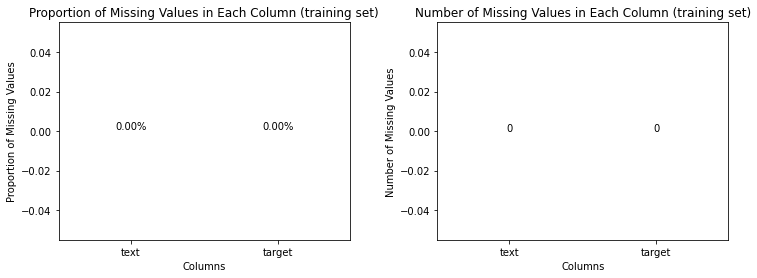

In [9]:
prop_missing = dataset.isna().mean()
sum_missing = dataset.isna().sum()

# one row and two columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

#barchart of PROPORTION of missing values
axs[0].bar(prop_missing.index, prop_missing)
axs[0].set_title('Proportion of Missing Values in Each Column (training set)')
axs[0].set_xlabel('Columns')
axs[0].set_ylabel('Proportion of Missing Values')
for i, v in enumerate(prop_missing):
    axs[0].annotate(f"{v:.2%}", xy=(i, v), ha='center', va='bottom')

#barchart of NUMBER of missing values
axs[1].bar(sum_missing.index, sum_missing)
axs[1].set_title('Number of Missing Values in Each Column (training set)')
axs[1].set_xlabel('Columns')
axs[1].set_ylabel('Number of Missing Values')
for i, v in enumerate(sum_missing):
    axs[1].annotate(v, xy=(i, v), ha='center')

# display the plot
fig.subplots_adjust(wspace=0.3)
plt.show()

In [6]:
dls_lm = TextDataLoaders.from_df(dataset, path='.', valid_pct=0.2, seed=None,
                          text_col=0, label_col=1, label_delim=None,
                          y_block=None, text_vocab=None, is_lm=False,
                          valid_col=None, tok_tfm=None,
                          tok_text_col='text', seq_len=32, bs=39)
dls_lm.show_batch(max_n=5)

,text,category
0,xxbos xxup if 👏 🏼 xxup your 👏 🏼 xxup woman 👏 🏼 xxup likes 👏 🏼 xxup being 👏 🏼 xxup choked 👏 🏼 xxup during 👏 🏼 xxup sex 👏 🏼 xxup you 're 👏 🏼 xxup supposed 👏 🏼 xxup to 👏 🏼 xxup xxunk 👏 🏼 xxup the 👏 🏼 xxup sides 👏 🏼 xxup of …,0
1,xxbos xxup nws xxmaj alert > xxmaj strong xxmaj thunderstorm xxmaj near xxmaj glen xxmaj allan or 11 xxmaj miles s of xxmaj avon xxmaj moving e xxmaj at 50 xxup mph . xxmaj dime xxmaj size xxmaj hail xxmaj possible . xxup l … https : / / t.co / xxunk,1
2,"xxbos xxup this xxup should xxup go xxup global . xxup this xxup is xxup us xxup in xxup australia xxup choking xxup on xxup smoke xxup right xxup now , xxup and xxup if xxup the xxup rest xxup of xxup you xxup do n’t xxup drastically xxup cut …",0
3,"xxbos xxmaj xxunk . xxup alert ! 💜 xxmaj gov xxmaj xxunk xxup civil xxup xxunk ordering 10 , xxrep 3 0 xxmaj body xxmaj bags . xxmaj door to xxmaj door xxmaj gun xxmaj xxunk xxup by xxup force . xxmaj arrest … https : / / t.co / xxunk",0
4,"xxbos xxup nws xxmaj alert > xxmaj strong xxmaj thunderstorm xxmaj over xxmaj xxunk xxmaj moving e xxmaj at 50 xxup mph . xxmaj small xxmaj hail , xxmaj winds xxmaj over 30 xxup mph xxmaj possible . xxmaj locations xxmaj xxunk … https : / / t.co / xxunk",1


In [7]:
learn = language_model_learner(dls_lm, AWD_LSTM, metrics=accuracy).to_fp16()

In [8]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time


ValueError: ignored

# Nuova sezione

In [52]:
dataframe = pd.read_csv("/content/drive/MyDrive/ML_proj/tweets.csv")
dataframe.drop(columns = ["keyword", "location","id"], inplace =True)
dataframe.head()
dataframe.to_csv()

',text,target\n0,"Communal violence in Bhainsa, Telangana. ""Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…",1\n1,"Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…",1\n2,Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI,1\n3,Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9,1\n4,"""Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8",0\n5,"If this child was Chinese, this tweet would have gone viral. Social media would be ablaze. SNL would have made a racist j…",0\n6,"Several houses have been set ablaze in Ngemsibaa village, Oku sub division in the North West Region of Cameroon by… https://t.co/99uHGAzxy2",1\n7,Asansol: A BJP office in Salanpur village was set ablaze last night. BJP has alleged that TMC is behind the incident. Pol

In [53]:

dls_lm = TextDataLoaders.from_folder("/content/drive/MyDrive/ML_proj/tweets.csv", is_lm=True, valid_pct=0.1)

TypeError: ignored